In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
data.shape

(9800, 18)

In [ ]:
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
data.rename(columns=str.lower,inplace=True)
data.columns=data.columns.str.replace(" ","_")

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%Y')
data['ship_date'] = pd.to_datetime(data['ship_date'], format='%d/%m/%Y')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9800 non-null   int64         
 1   order_id       9800 non-null   object        
 2   order_date     9800 non-null   datetime64[ns]
 3   ship_date      9800 non-null   datetime64[ns]
 4   ship_mode      9800 non-null   object        
 5   customer_id    9800 non-null   object        
 6   customer_name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9800 non-null   object        
 9   city           9800 non-null   object        
 10  state          9800 non-null   object        
 11  postal_code    9789 non-null   float64       
 12  region         9800 non-null   object        
 13  product_id     9800 non-null   object        
 14  category       9800 non-null   object        
 15  sub-category   9800 n

In [ ]:
data[data['postal_code'].isna()]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
data['postal_code'].fillna('05401', inplace=True)

In [ ]:
data.isna().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
dtype: int64

Descriptive analysis of the sales

In [ ]:
statistics = data['sales'].describe()
statistics

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: sales, dtype: float64

In [ ]:
data['category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: category, dtype: int64

Text(0, 0.5, 'Frequency')

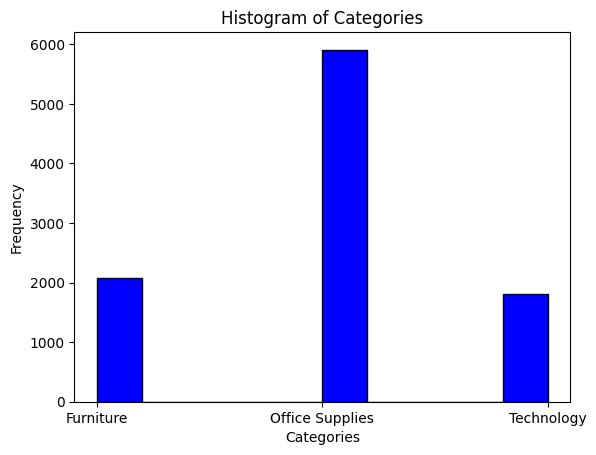

In [ ]:
plt.hist(data['category'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')

In [ ]:
data['region'].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: region, dtype: int64

Text(0, 0.5, 'Frequency')

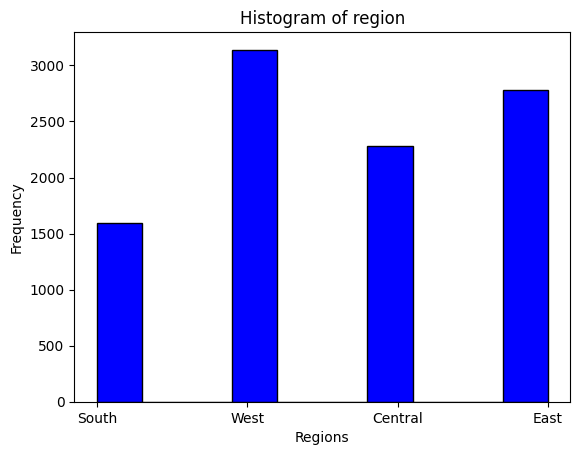

In [ ]:
plt.hist(data['region'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of region')
plt.xlabel('Regions')
plt.ylabel('Frequency')

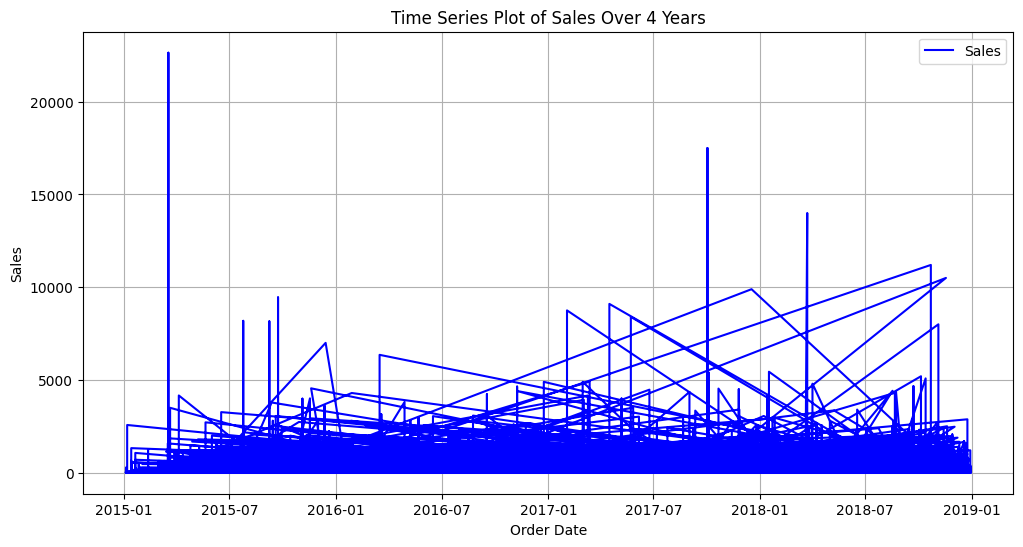

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['order_date'], data['sales'], label='Sales', color='blue')
plt.title('Time Series Plot of Sales Over 4 Years')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

Text(0, 0.5, 'Sales')

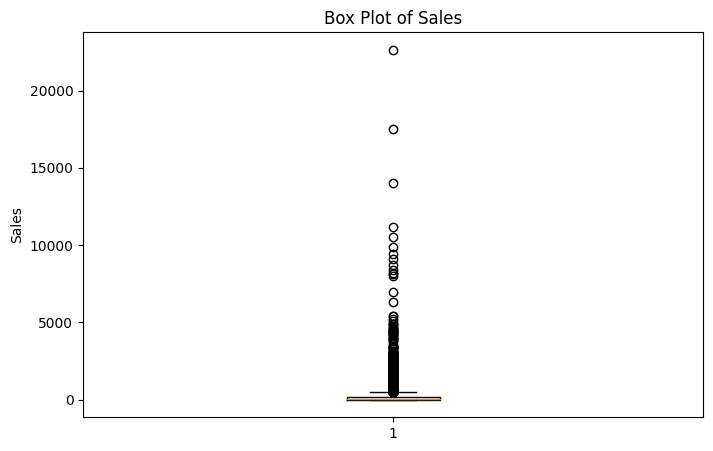

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot(data['sales'])
plt.title('Box Plot of Sales')
plt.ylabel('Sales')

In [ ]:
data['sub-category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: sub-category, dtype: int64

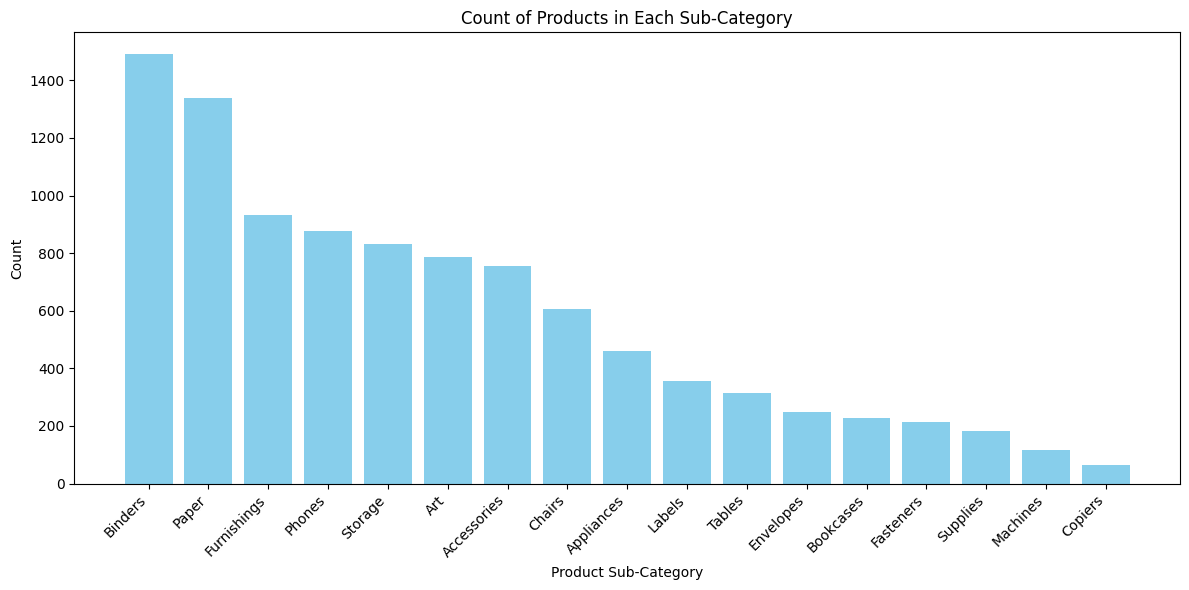

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(data['sub-category'].value_counts().index, data['sub-category'].value_counts(), color='skyblue')
plt.title('Count of Products in Each Sub-Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


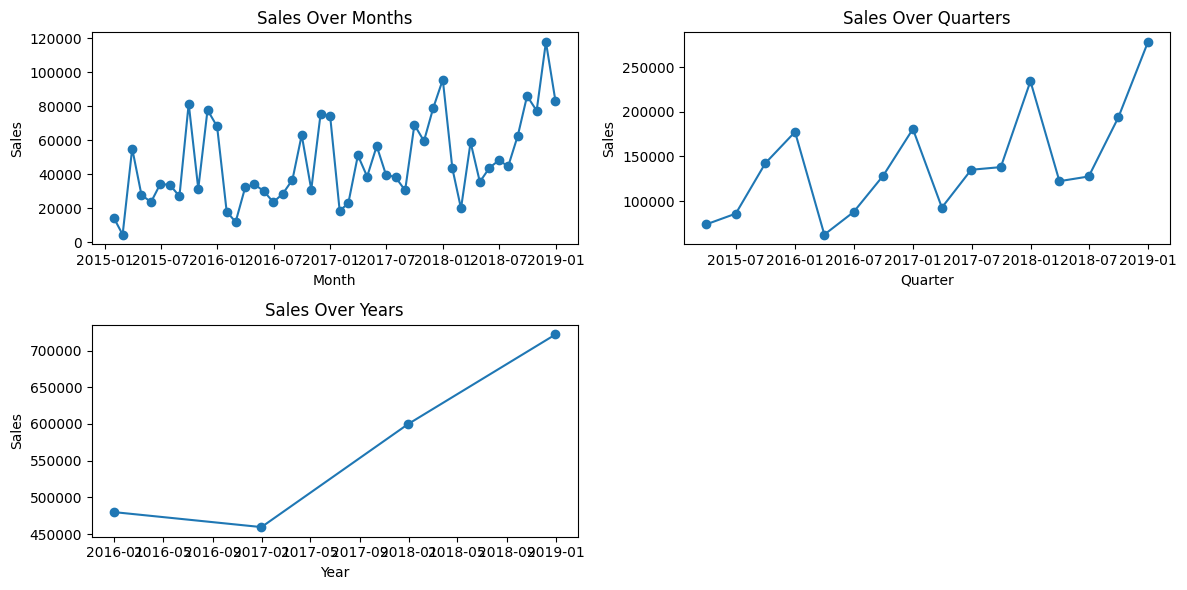

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])

# Set 'order_date' as the index for time-based operations
data.set_index('order_date', inplace=True)

# Plotting line chart for sales over different periods
plt.figure(figsize=(12, 6))

# Sales over months
sales_monthly = data.resample('M')['sales'].sum()
plt.subplot(2, 2, 1)
plt.plot(sales_monthly, marker='o')
plt.title('Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')

# Sales over quarters
sales_quarterly = data.resample('Q')['sales'].sum()
plt.subplot(2, 2, 2)
plt.plot(sales_quarterly, marker='o')
plt.title('Sales Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Sales')

# Sales over years
sales_yearly = data.resample('Y')['sales'].sum()
plt.subplot(2, 2, 3)
plt.plot(sales_yearly, marker='o')
plt.title('Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')

# Show the plots
plt.tight_layout()
plt.show()

<ipython-input-91-0082e84c3ce4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ship_mode', y='sales', data=data, ci=None)


Text(0, 0.5, 'Sales')

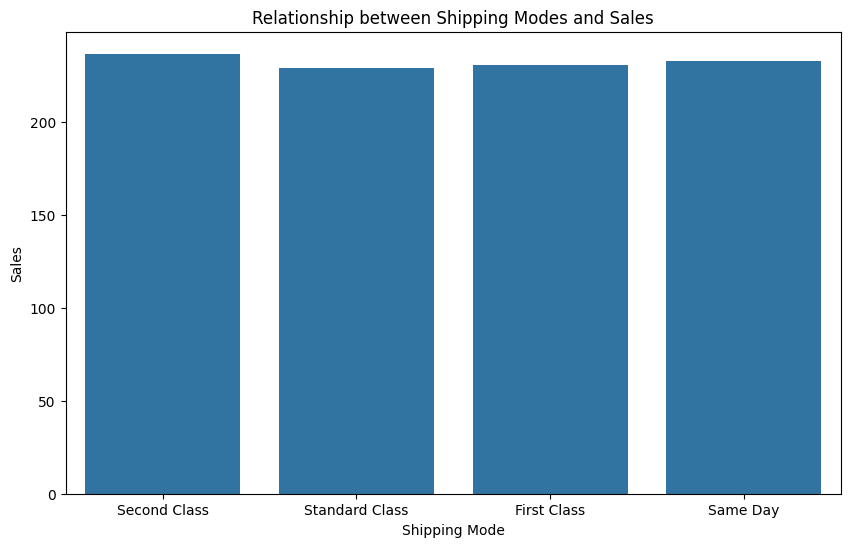

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='ship_mode', y='sales', data=data, ci=None)
plt.title('Relationship between Shipping Modes and Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')


<ipython-input-92-e861f66355cd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='sales', data=data, estimator=sum, ci=None, hue='category', palette='viridis')


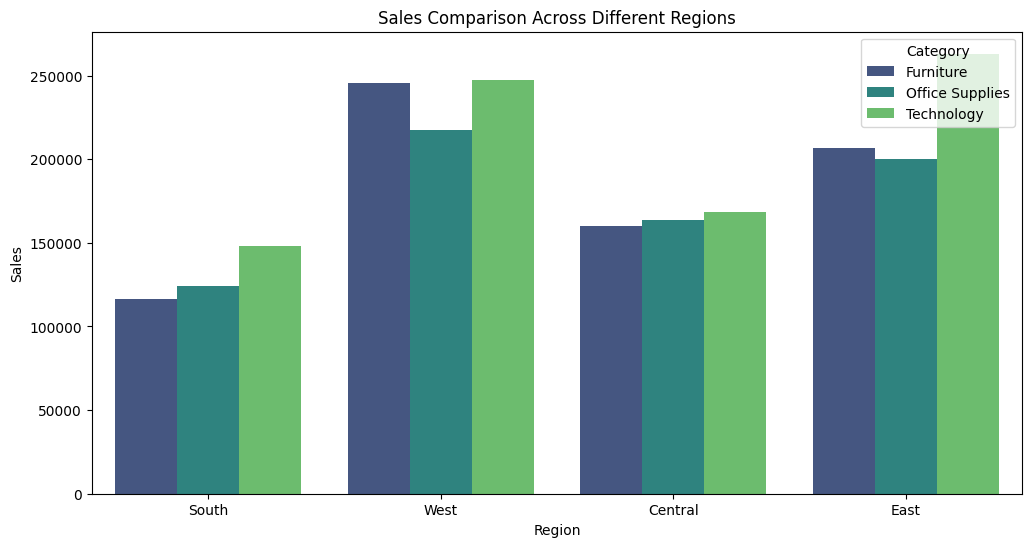

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='sales', data=data, estimator=sum, ci=None, hue='category', palette='viridis')
plt.title('Sales Comparison Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='Category', loc='upper right')

In [ ]:
data['segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: segment, dtype: int64

Text(0.5, 1.0, 'Distribution of Segments')

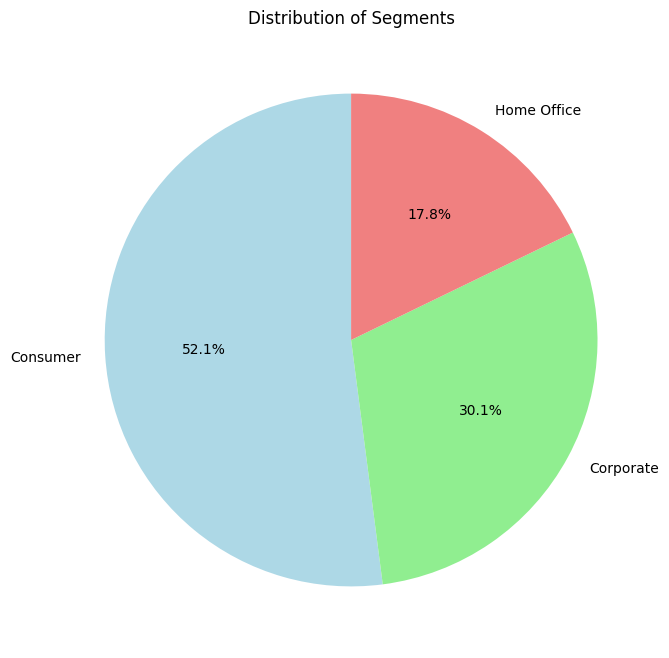

In [ ]:
segment_counts = data['segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Segments')

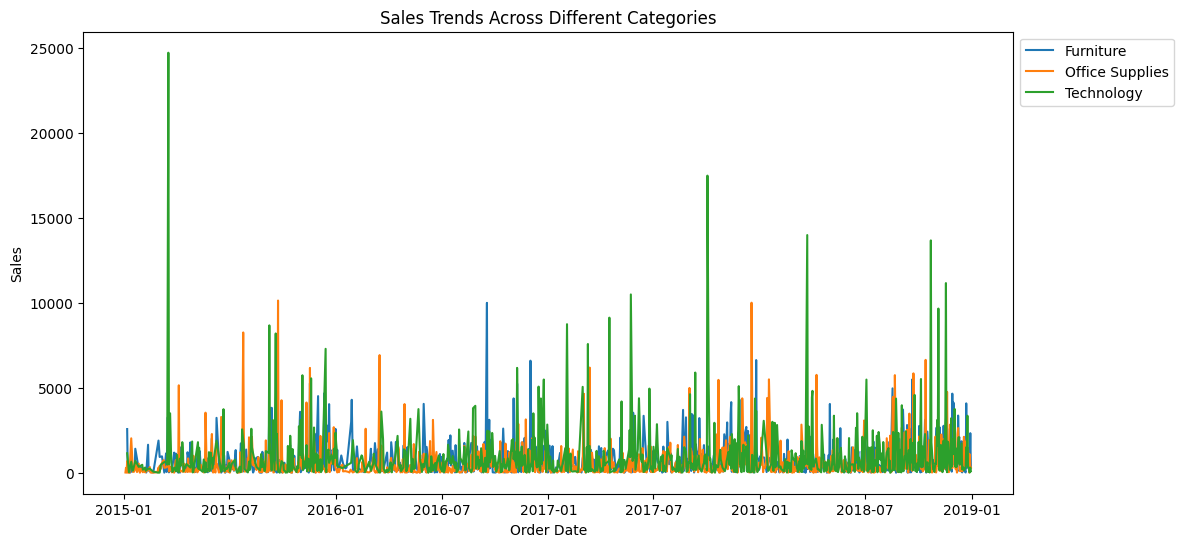

In [ ]:
sales_by_category = data.groupby(['category', 'order_date'])['sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
for category in sales_by_category['category'].unique():
    category_data = sales_by_category[sales_by_category['category'] == category]
    plt.plot(category_data['order_date'], category_data['sales'], label=category)
plt.title('Sales Trends Across Different Categories')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))